# Prediction of Closed Questions on StackOverflow

In [55]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import time

####  Function `set_binary` to convert the Multiclass Labels to Binary Labels

In [56]:
def set_binary(row):
    if row == 3:
        return 0
    else :
        return 1

### Data to use for Training and Validation

1: Balanced Dataset
    
2: Unbalanced Dataset

3: Undersampled Dataset

In [57]:
data_to_use = 1

# Balanced Dataset

It contains 50% Open and 50% Closed .i.e,
89176 closed & 89176 open records

In [58]:
if(data_to_use == 1 ):
    
    raw_features=pd.read_csv('data/data_small.csv')
    raw_features=raw_features.drop('Unnamed: 0',axis=1)

    y = raw_features['label'].apply(set_binary)
    raw_features = raw_features.drop('label',axis=1)
    X = raw_features.as_matrix()

# Imbalanced Dataset

Total Records:

Closed: 89176 

Open  : 

In [59]:
if(data_to_use == 2 ):
    
    raw_features=pd.read_csv('data/data_large.csv')
    raw_features=raw_features.drop('Unnamed: 0',axis=1)

    y = raw_features['label'].apply(set_binary)
    raw_features = raw_features.drop('label',axis=1)
    X = raw_features.as_matrix()

# Undersampling the Large Imbalanced Dataset

In [60]:
if(data_to_use == 3):
    raw_features=pd.read_csv('data/data_large.csv')
    raw_features=raw_features.drop('Unnamed: 0',axis=1)

In [61]:
if(data_to_use == 3):

    from collections import Counter
    from imblearn.under_sampling import RandomUnderSampler
    import math

    def plot_pie(y):
        target_stats = Counter(y)
        labels = list(target_stats.keys())
        sizes = list(target_stats.values())
        explode = tuple([0.1] * len(target_stats))

        fig, ax = plt.subplots()
        ax.pie(sizes, explode=explode, labels=labels, shadow=True,
               autopct='%1.1f%%')
        ax.axis('equal')

    Y_ = raw_features1['label']  
    X_ = raw_features1.drop('label',axis=1)

    #ratio = 'auto'
    
    
    # r is the fraction of open records in the required complete data
    f = 1/2
    
    
    m = f/(1-f)
    ratio = {0: math.ceil(Counter(Y_)[1]*m), 1: Counter(Y_)[1]}
    X_res, y_res = RandomUnderSampler(ratio=ratio, random_state=0).fit_sample(X_, Y_)

    y=y_res

    X=X_res

    print('Information of the big data set after balancing using "auto"'
          ' mode:\n ratio={} \n y: {}'.format(ratio, Counter(y_res)))
    plot_pie(y_res)

## Splitting the Data into train and test.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 6)

## Random Forest Classifier

In [63]:
start = time.time()
clf = RandomForestClassifier(n_estimators=100,max_depth=15,n_jobs=-1).fit(X_train, y_train)
end = time.time()
print(end - start)

1.9938011169433594


In [64]:
print('Accuracy of RF classifier on training set: {:.5f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.5f}'.format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.79757
Accuracy of RF classifier on test set: 0.69322


In [65]:
y_predicted = clf.predict(X_test)

#### Creating Confusion Matrix and Measuring Prescision Recall

In [66]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[12008,  5870],
       [ 5073, 12720]])

In [67]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, y_predicted)
recall_sco=recall_score(y_test,y_predicted)
precision_sco=precision_score(y_test,y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Recall score: {0:0.2f}'.format(recall_sco))
print('Precision score: {0:0.2f}'.format(precision_sco))

Average precision-recall score: 0.77
Recall score: 0.71
Precision score: 0.68


<IPython.core.display.Javascript object>


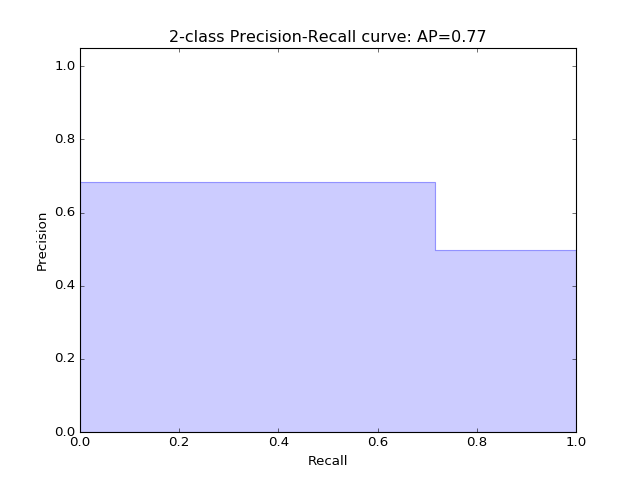

In [68]:
if(data_to_use == 1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    precision, recall, _ = precision_recall_curve(y_test, y_predicted)

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

## Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
nbclf = GaussianNB().fit(X_train, y_train)
end = time.time()
print(end - start)
print('Accuracy of GaussianNB classifier on training set: {:.6f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.6f}'
     .format(nbclf.score(X_test, y_test)))
# y_train.shape

0.05024266242980957
Accuracy of GaussianNB classifier on training set: 0.540850
Accuracy of GaussianNB classifier on test set: 0.543130


In [71]:
y_predicted = nbclf.predict(X_test)

#### Creating Confusion Matrix and Measuring Prescision Recall

In [72]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[ 4368, 13510],
       [ 2787, 15006]])

In [73]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, y_predicted)
recall_sco=recall_score(y_test,y_predicted)
precision_sco=precision_score(y_test,y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Recall score: {0:0.2f}'.format(recall_sco))
print('Precision score: {0:0.2f}'.format(precision_sco))

Average precision-recall score: 0.72
Recall score: 0.84
Precision score: 0.53


## Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
gbc = GradientBoostingClassifier().fit(X_train, y_train)
end = time.time()
print(end - start)

print('Accuracy of GBDT classifier on training set: {:.6f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.6f}'
     .format(gbc.score(X_test, y_test)))

13.012821674346924
Accuracy of GBDT classifier on training set: 0.700976
Accuracy of GBDT classifier on test set: 0.692888


In [75]:
y_predicted = gbc.predict(X_test)

#### Creating Confusion Matrix and Measuring Prescision Recall

In [76]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[12064,  5814],
       [ 5141, 12652]])

In [77]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, y_predicted)
recall_sco=recall_score(y_test,y_predicted)
precision_sco=precision_score(y_test,y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Recall score: {0:0.2f}'.format(recall_sco))
print('Precision score: {0:0.2f}'.format(precision_sco))

Average precision-recall score: 0.77
Recall score: 0.71
Precision score: 0.69


## Neural Network Classifier

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start = time.time()
nn = MLPClassifier(hidden_layer_sizes = [5,], alpha = 2,
                   random_state = 4, solver='lbfgs').fit(X_train_scaled, y_train)
end = time.time()
print(end - start)

print('Accuracy of NN classifier on training set: {:.6f}'
     .format(nn.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.6f}'
     .format(nn.score(X_test_scaled, y_test)))

ImportError: cannot import name 'MLPClassifier'

In [ ]:
y_predicted = nn.predict(X_test)
y_predicted

#### Creating Confusion Matrix and Measuring Prescision Recall

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predicted)
confusion

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

average_precision = average_precision_score(y_test, y_predicted)
recall_sco=recall_score(y_test,y_predicted)
precision_sco=precision_score(y_test,y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Recall score: {0:0.2f}'.format(recall_sco))
print('Precision score: {0:0.2f}'.format(precision_sco))